<center>
<img src="./pict/panda_logo_ts.png">
<br />
<br />

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.to_datetime('01.01.2020')

Timestamp('2020-01-01 00:00:00')

In [3]:
# Date Time Index
dti = pd.to_datetime(['01.01.2020', 'Jan 1, 2020', 
                      np.datetime64('2020-01-01'), 
                      datetime.datetime(2020, 1, 1), None])
dti

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [4]:
dti[-1] == dti[-1]

False

In [5]:
pd.to_datetime(['01-03-2020 10:00'], dayfirst=True)

DatetimeIndex(['2020-03-01 10:00:00'], dtype='datetime64[ns]', freq=None)

In [6]:
pd.to_datetime(['20-01-2020', '01-03-2020'], dayfirst=True) # не строго

DatetimeIndex(['2020-01-20', '2020-03-01'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime('03-01-2020 05:30', format='%d-%m-%Y %H:%M') # явный формат даты

Timestamp('2020-01-03 05:30:00')

In [8]:
pd.to_datetime(['2009/07/31', 'test']) # ошибка

ValueError: ('Unknown string format:', 'test')

In [9]:
not_dti = pd.to_datetime(['2009/07/31', 'test'], errors='ignore') # пути обхода
not_dti[0]

'2009/07/31'

In [10]:
dti1 = pd.to_datetime(['2009/07/31', 'test'], errors='coerce')
dti1

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

In [11]:
# можно еще и так

df = pd.DataFrame({'year': [2020, 2020],
                   'month': [1, 3],
                   'day': [3, 5],
                   'hour': [2, 3]})

pd.to_datetime(df)

0   2020-01-03 02:00:00
1   2020-03-05 03:00:00
dtype: datetime64[ns]

In [12]:
dti[0] # TimeStamp - базовый объект времени в Pandas

Timestamp('2020-01-01 00:00:00')

In [13]:
datetime.datetime(2020, 1, 1)

datetime.datetime(2020, 1, 1, 0, 0)

In [14]:
pd.Timestamp(datetime.datetime(2020, 1, 1)) # явное приведение типов

Timestamp('2020-01-01 00:00:00')

In [15]:
pd.Timestamp.min, pd.Timestamp.max # ограничения

(Timestamp('1677-09-21 00:12:43.145225'),
 Timestamp('2262-04-11 23:47:16.854775807'))

In [16]:
pd.NaT # аналог np.nan, None и т.д.

NaT

In [17]:
pd.NaT is pd.NaT

True

In [18]:
pd.date_range(start='2020-01-01', end='2020-01-02', freq='H') # генерация date time индекса

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
pd.date_range('2020-01-01', '2020-01-05', periods=10)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 10:40:00',
               '2020-01-01 21:20:00', '2020-01-02 08:00:00',
               '2020-01-02 18:40:00', '2020-01-03 05:20:00',
               '2020-01-03 16:00:00', '2020-01-04 02:40:00',
               '2020-01-04 13:20:00', '2020-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts = pd.Series(np.random.randint(0, 100, size=100), 
          index=pd.date_range('2020-01-01', periods=100, freq='D'))

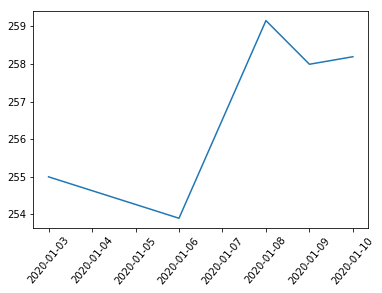

In [70]:
plt.plot(ts['CLOSE']['2020-0])
plt.xticks(rotation=50)
plt.show()

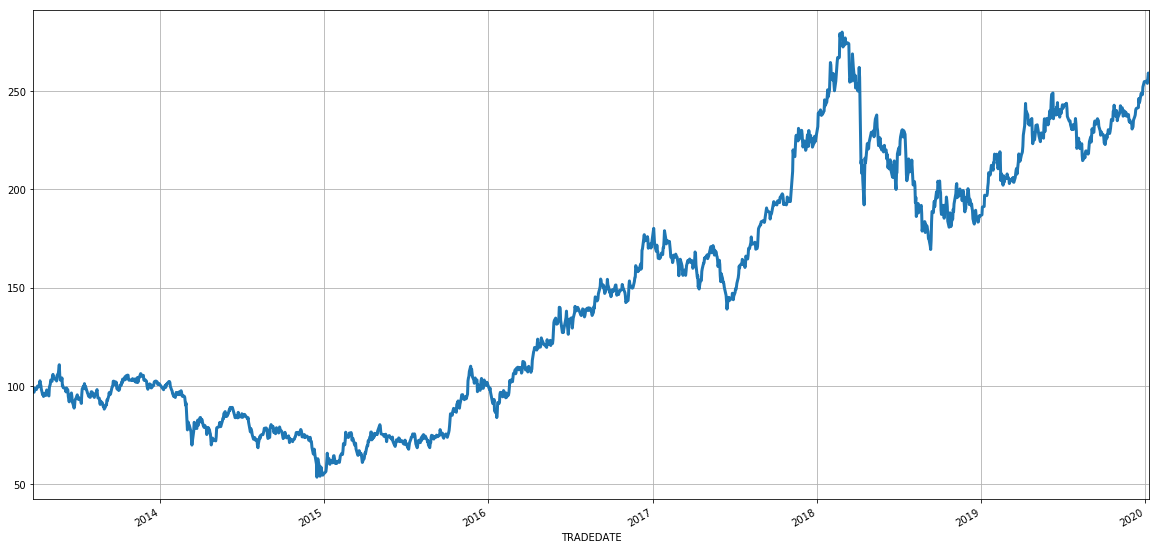

In [22]:
ts = pd.read_csv('./data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [23]:
ts['2019-12-02':'2019-12-27'] # можно делать slice, крайние точки включены

TRADEDATE
2019-12-02    233.77
2019-12-03    230.66
2019-12-04    231.59
2019-12-05    231.71
2019-12-06    235.14
2019-12-09    237.04
2019-12-10    237.91
2019-12-11    240.32
2019-12-12    241.05
2019-12-13    241.21
2019-12-16    241.45
2019-12-17    241.60
2019-12-18    246.20
2019-12-19    244.00
2019-12-20    244.71
2019-12-23    248.80
2019-12-24    248.67
2019-12-25    248.04
2019-12-26    248.24
2019-12-27    252.06
Name: CLOSE, dtype: float64

In [24]:
ts.index.resolution

'day'

In [25]:
ts['2020-01'] # и так, потому что 2020-01 больше чем resolution индекса

TRADEDATE
2020-01-03    255.00
2020-01-06    253.90
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Name: CLOSE, dtype: float64

In [26]:
ts['2017':'2020-01-03'] # и так 

TRADEDATE
2017-01-03    180.12
2017-01-04    175.95
2017-01-05    171.90
2017-01-06    170.69
2017-01-09    168.35
2017-01-10    171.60
2017-01-11    169.05
2017-01-12    168.27
2017-01-13    164.90
2017-01-16    164.66
2017-01-17    165.98
2017-01-18    165.24
2017-01-19    166.30
2017-01-20    167.49
2017-01-23    166.75
2017-01-24    170.25
2017-01-25    170.26
2017-01-26    173.79
2017-01-27    178.92
2017-01-30    174.60
2017-01-31    172.20
2017-02-01    173.90
2017-02-02    172.83
2017-02-03    173.80
2017-02-06    172.87
2017-02-07    173.47
2017-02-08    171.20
2017-02-09    168.80
2017-02-10    165.50
2017-02-13    164.70
               ...  
2019-11-20    237.78
2019-11-21    237.15
2019-11-22    238.13
2019-11-25    237.98
2019-11-26    235.00
2019-11-27    234.22
2019-11-28    235.20
2019-11-29    233.98
2019-12-02    233.77
2019-12-03    230.66
2019-12-04    231.59
2019-12-05    231.71
2019-12-06    235.14
2019-12-09    237.04
2019-12-10    237.91
2019-12-11    240.32
201

In [27]:
ts.index[2].day_name() # есть встроенный календарь 

'Wednesday'

In [28]:
friday = (ts.index[2] + pd.Timedelta('2D')) # time delta
friday.day_name()

'Friday'

In [29]:
friday 

Timestamp('2013-03-29 00:00:00')

In [30]:
friday + pd.offsets.BusinessDay() 

Timestamp('2013-04-01 00:00:00')

In [31]:
monday = friday + pd.offsets.BusinessDay() # offset умнее time delta
monday.day_name()

'Monday'

In [32]:
stamp = pd.Timestamp('2020-01-04 00:00:00')
offset = pd.offsets.BusinessHour(start='09:00', end='18:00')

offset.rollforward(stamp) #rollback

Timestamp('2020-01-06 09:00:00')

In [33]:
offset.rollforward(stamp).day_name()

'Monday'

In [34]:
stamp + offset # перейдет на понедельник и прибавит бизнес час

Timestamp('2020-01-06 10:00:00')

In [35]:
(stamp + offset).normalize() # нормализация даты

Timestamp('2020-01-06 00:00:00')

In [36]:
stamp + pd.offsets.Week(weekday=4) # offset с параметризацией

Timestamp('2020-01-10 00:00:00')

In [37]:
(stamp + pd.offsets.Week(weekday=4)).weekday() 

4

In [38]:
(stamp + pd.offsets.Week(weekday=4)).day_name()

'Friday'

In [39]:
dti

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [40]:
dti + pd.offsets.LastWeekOfMonth() # можно оперирировать сразу со всем date time index'ом

/Users/aleksey_ryabykh/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


DatetimeIndex(['2020-01-27', '2020-01-27', '2020-01-27', '2020-01-27', 'NaT'], dtype='datetime64[ns]', freq=None)

In [41]:
# кастомизация рабочего дня

weekmask_egypt = 'Sun Mon Tue Wed Thu'
holidays = ['2012-05-01',
            datetime.datetime(2013, 5, 1),
            np.datetime64('2014-05-01')]

bday_egypt = pd.offsets.CustomBusinessDay(holidays=holidays,
                                          weekmask=weekmask_egypt)

dt = datetime.datetime(2013, 4, 30)

dt + 2 * bday_egypt

Timestamp('2013-05-05 00:00:00')

In [42]:
pd.Timestamp(dt).day_name()

'Tuesday'

In [43]:
(dt + 2 * bday_egypt).day_name()

'Sunday'

In [44]:
# генерация кастомного индекса рабочих дней

weekmask = 'Mon Wed Fri'
holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]
bdti = pd.bdate_range('2020-01-01', '2020-01-20', freq='C', weekmask=weekmask, holidays=holidays)
bdti

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-06', '2020-01-08',
               '2020-01-10', '2020-01-13', '2020-01-15', '2020-01-17',
               '2020-01-20'],
              dtype='datetime64[ns]', freq='C')

In [45]:
# кастомизация рабочего часа

cbh = pd.offsets.CustomBusinessHour(start='10:00', weekmask='Tue Wed Thu Fri')
print((dti[0] + pd.Timedelta(days=-2)).day_name())
dti[0] + pd.Timedelta(days=-2) + cbh

Monday


Timestamp('2019-12-31 11:00:00')

In [46]:
# кастомизация календаря

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day

class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2019, 12, 31)
    rules = [Holiday('Рабочая суббота', month=3, day=7, year=2020,
                     offset=Day(1))]
    
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                              calendar=RussianBusinessCalendar())

In [47]:
ts.head()

TRADEDATE
2013-03-25    98.79
2013-03-26    97.20
2013-03-27    96.75
2013-03-28    98.59
2013-03-29    98.76
Name: CLOSE, dtype: float64

In [48]:
# преобразование частоты

ts.asfreq(pd.offsets.Day()) #.fillna(method='pad')

TRADEDATE
2013-03-25     98.79
2013-03-26     97.20
2013-03-27     96.75
2013-03-28     98.59
2013-03-29     98.76
2013-03-30       NaN
2013-03-31       NaN
2013-04-01     98.07
2013-04-02     98.93
2013-04-03     99.59
2013-04-04     99.91
2013-04-05     99.38
2013-04-06       NaN
2013-04-07       NaN
2013-04-08    100.43
2013-04-09    102.53
2013-04-10    100.56
2013-04-11    100.31
2013-04-12     98.34
2013-04-13       NaN
2013-04-14       NaN
2013-04-15     95.48
2013-04-16     95.92
2013-04-17     94.58
2013-04-18     95.35
2013-04-19     96.22
2013-04-20       NaN
2013-04-21       NaN
2013-04-22     95.10
2013-04-23     96.46
               ...  
2019-12-12    241.05
2019-12-13    241.21
2019-12-14       NaN
2019-12-15       NaN
2019-12-16    241.45
2019-12-17    241.60
2019-12-18    246.20
2019-12-19    244.00
2019-12-20    244.71
2019-12-21       NaN
2019-12-22       NaN
2019-12-23    248.80
2019-12-24    248.67
2019-12-25    248.04
2019-12-26    248.24
2019-12-27    252.06
201

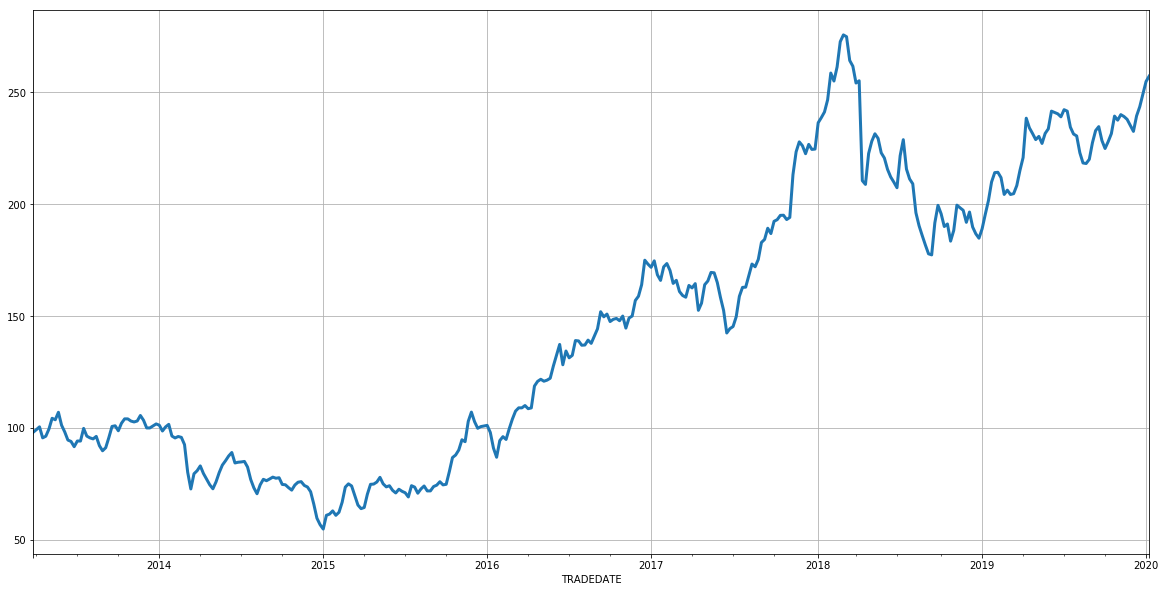

In [49]:
ts.resample('1W').mean().plot(figsize=(20, 10), linewidth=3, grid=True) # ресамплинг от дней к неделям

In [50]:
ts.resample('1W').agg([np.sum, np.mean, np.std]).head() # агрегации по временному индексу

,sum,mean,std
TRADEDATE,,,
2013-03-31,490.09,98.018,0.968334
2013-04-07,495.88,99.176,0.713358
2013-04-14,502.17,100.434,1.484025
2013-04-21,477.55,95.510,0.625220
2013-04-28,481.16,96.232,1.060269


In [51]:
ts.shift(5).head(20) # лаги

TRADEDATE
2013-03-25       NaN
2013-03-26       NaN
2013-03-27       NaN
2013-03-28       NaN
2013-03-29       NaN
2013-04-01     98.79
2013-04-02     97.20
2013-04-03     96.75
2013-04-04     98.59
2013-04-05     98.76
2013-04-08     98.07
2013-04-09     98.93
2013-04-10     99.59
2013-04-11     99.91
2013-04-12     99.38
2013-04-15    100.43
2013-04-16    102.53
2013-04-17    100.56
2013-04-18    100.31
2013-04-19     98.34
Name: CLOSE, dtype: float64

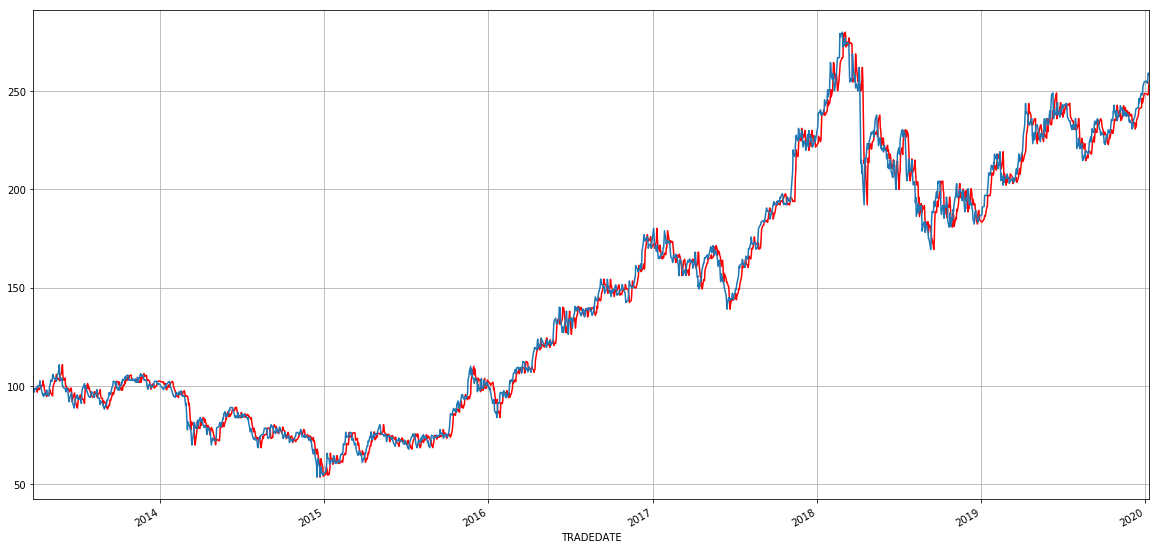

In [52]:
ts.shift(5).plot(figsize=(20, 10), color='red')
ts.plot(grid=True)

In [53]:
ts.asfreq('1D').fillna(-1).shift(5, freq=pd.offsets.BDay()) # 5 лаг по рабочим дням, с выравниванием по дате

TRADEDATE
2013-04-01     98.79
2013-04-02     97.20
2013-04-03     96.75
2013-04-04     98.59
2013-04-05     98.76
2013-04-05     -1.00
2013-04-05     -1.00
2013-04-08     98.07
2013-04-09     98.93
2013-04-10     99.59
2013-04-11     99.91
2013-04-12     99.38
2013-04-12     -1.00
2013-04-12     -1.00
2013-04-15    100.43
2013-04-16    102.53
2013-04-17    100.56
2013-04-18    100.31
2013-04-19     98.34
2013-04-19     -1.00
2013-04-19     -1.00
2013-04-22     95.48
2013-04-23     95.92
2013-04-24     94.58
2013-04-25     95.35
2013-04-26     96.22
2013-04-26     -1.00
2013-04-26     -1.00
2013-04-29     95.10
2013-04-30     96.46
               ...  
2019-12-19    241.05
2019-12-20    241.21
2019-12-20     -1.00
2019-12-20     -1.00
2019-12-23    241.45
2019-12-24    241.60
2019-12-25    246.20
2019-12-26    244.00
2019-12-27    244.71
2019-12-27     -1.00
2019-12-27     -1.00
2019-12-30    248.80
2019-12-31    248.67
2020-01-01    248.04
2020-01-02    248.24
2020-01-03    252.06
202

In [54]:
ts.rolling(window=5).mean() # скользящие статистики

TRADEDATE
2013-03-25        NaN
2013-03-26        NaN
2013-03-27        NaN
2013-03-28        NaN
2013-03-29     98.018
2013-04-01     97.874
2013-04-02     98.220
2013-04-03     98.788
2013-04-04     99.052
2013-04-05     99.176
2013-04-08     99.648
2013-04-09    100.368
2013-04-10    100.562
2013-04-11    100.642
2013-04-12    100.434
2013-04-15     99.444
2013-04-16     98.122
2013-04-17     96.926
2013-04-18     95.934
2013-04-19     95.510
2013-04-22     95.434
2013-04-23     95.542
2013-04-24     96.204
2013-04-25     96.356
2013-04-26     96.232
2013-04-29     96.178
2013-04-30     96.746
2013-05-02     97.336
2013-05-03     98.698
2013-05-06    100.034
               ...   
2019-11-26    237.208
2019-11-27    236.496
2019-11-28    236.106
2019-11-29    235.276
2019-12-02    234.434
2019-12-03    233.566
2019-12-04    233.040
2019-12-05    232.342
2019-12-06    232.574
2019-12-09    233.228
2019-12-10    234.678
2019-12-11    236.424
2019-12-12    238.292
2019-12-13    239.506


In [55]:
rolling_mean = ts.rolling(window=5).mean().shift(1) 
rolling_max = ts.rolling(window=5).max().shift(1)
rolling_min = ts.rolling(window=5).min().shift(1)
rolling_std = ts.rolling(window=5).std().shift(1)
upper_bond = rolling_mean + 1.96 * rolling_std
lower_bond = rolling_mean - 1.96 * rolling_std

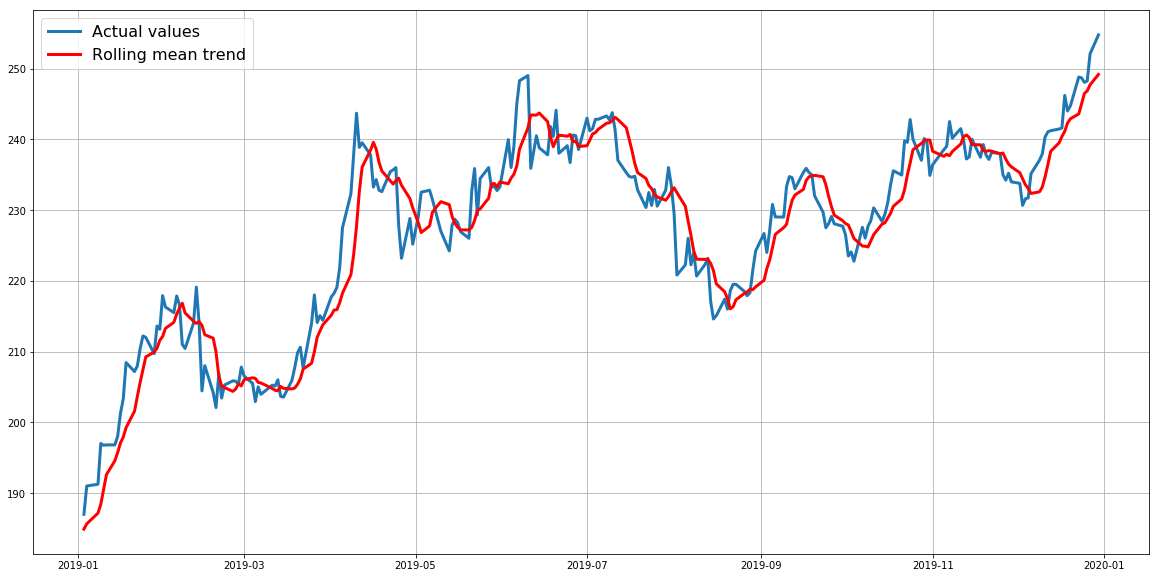

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_mean['2019'], "r", linewidth=3, label="Rolling mean trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

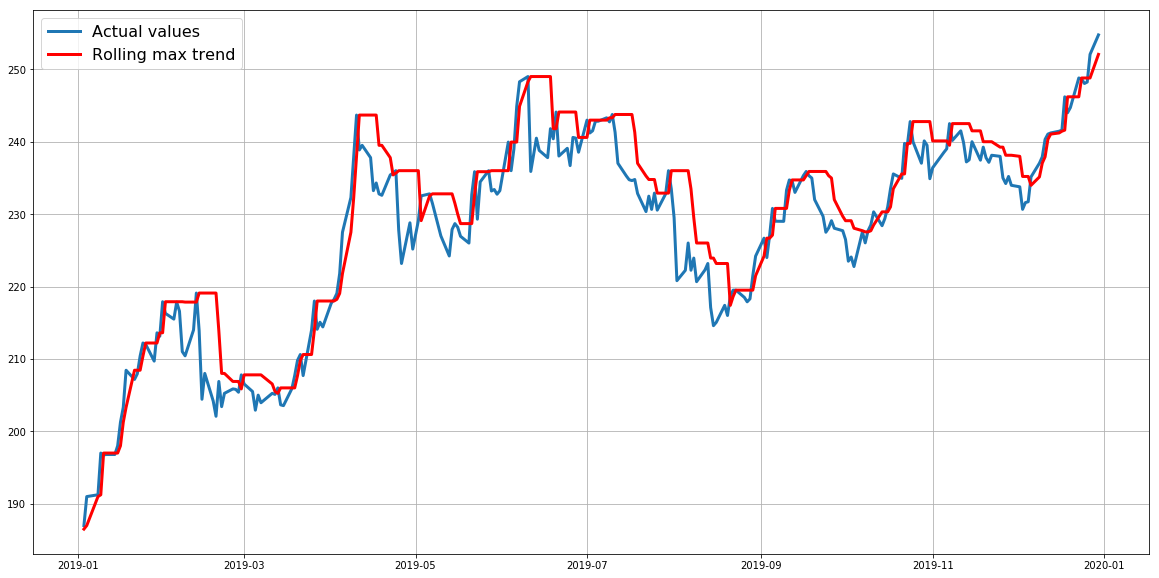

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_max['2019'], "r", linewidth=3, label="Rolling max trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

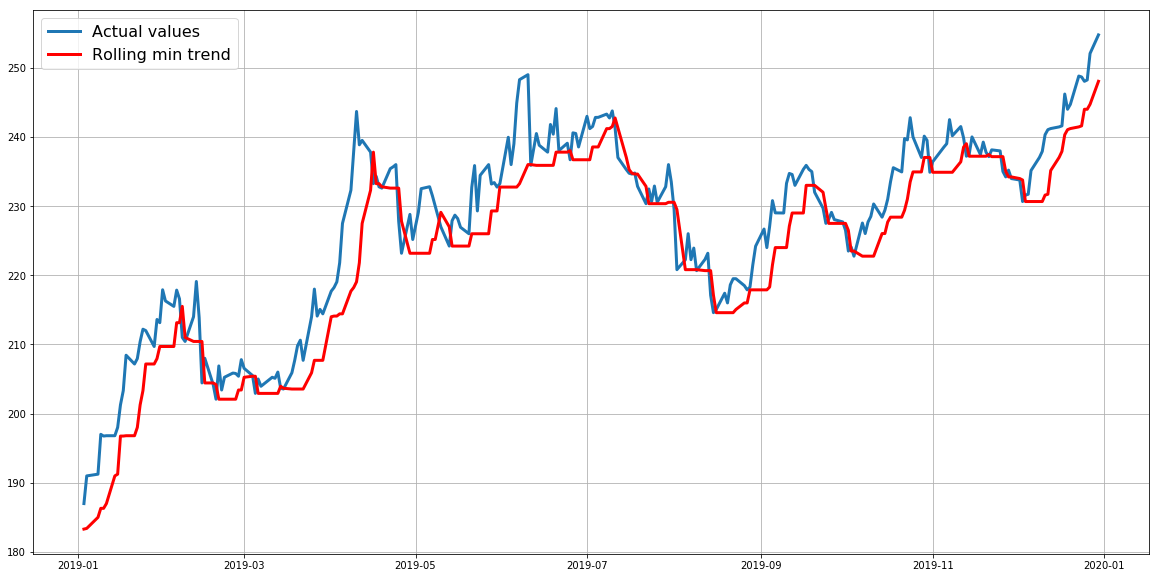

In [58]:

plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_min['2019'], "r", linewidth=3, label="Rolling min trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

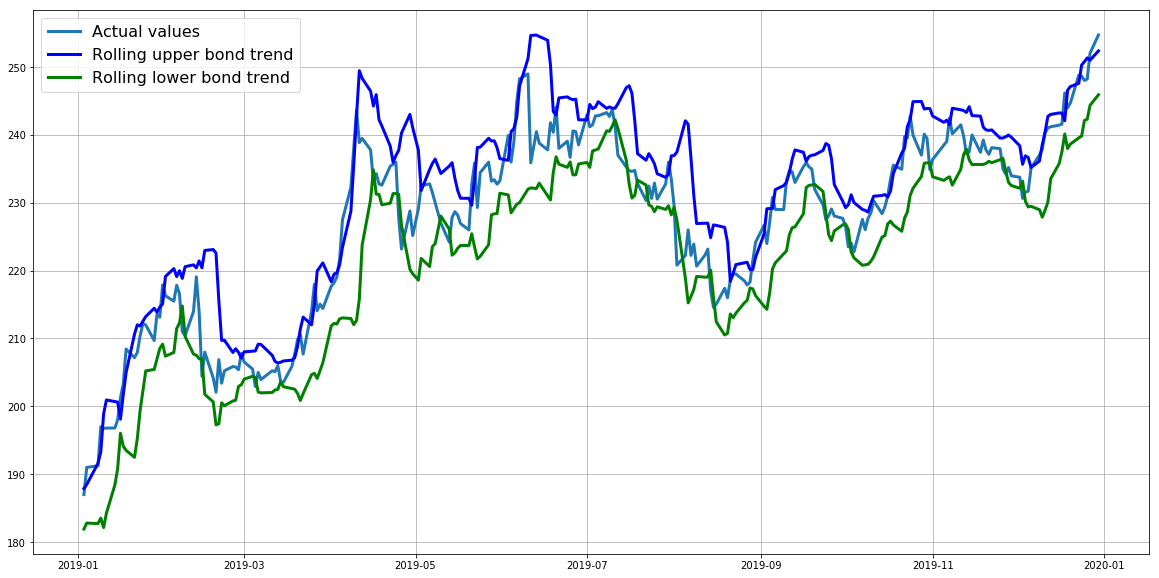

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(upper_bond['2019'], "b", linewidth=3, label="Rolling upper bond trend")
plt.plot(lower_bond['2019'], "g", linewidth=3, label="Rolling lower bond trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

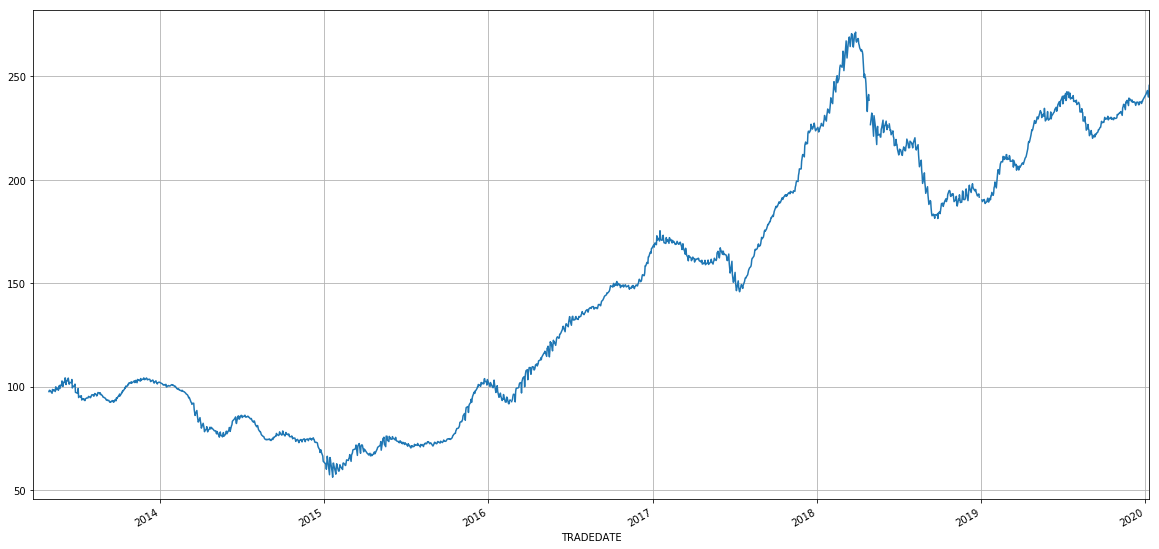

In [60]:
# с группировкой по дням недели

ts = pd.DataFrame(ts)
ts['weekday'] = ts.index.weekday
ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(20, 10), grid=True)

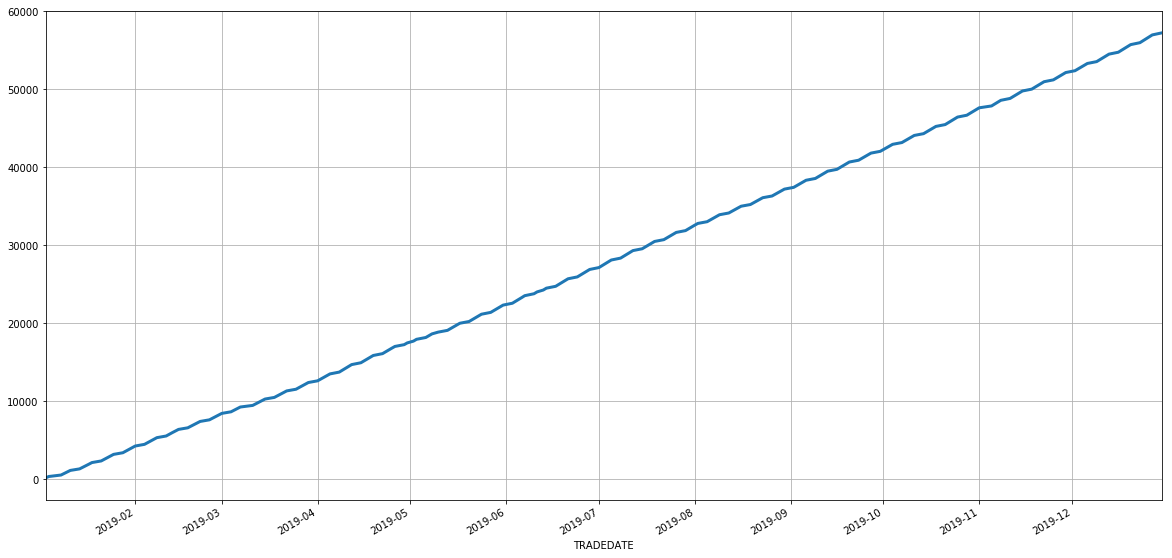

In [61]:
ts['2019'].CLOSE.expanding().sum().plot(figsize=(20, 10), grid=True, linewidth=3) # расширяющееся окно

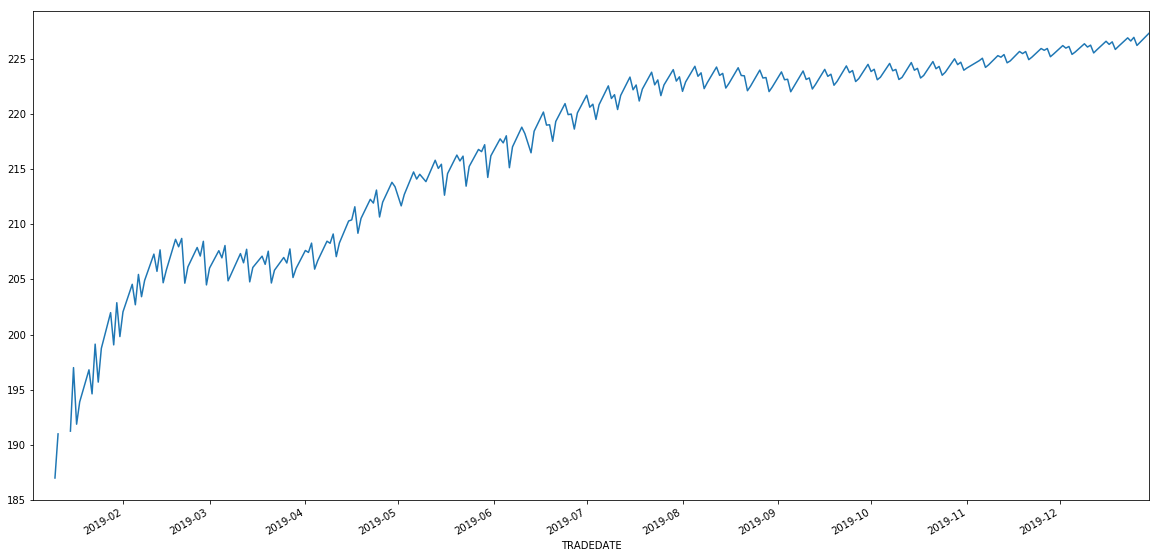

In [62]:
# можно и с группировкой
ts['2019'].groupby('weekday')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10))